In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('E-Commercedata.csv')

In [3]:
data.head()

,ID,Warehouse Block,Shipment Type,Customer Calls,Customer Rating,Product Cost,Prior Purchase,Product Importance,Gender,Discount,Weight,Reached on Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
data.size

131988

In [5]:
data.shape

(10999, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  10999 non-null  int64 
 1   Warehouse Block     10999 non-null  object
 2   Shipment Type       10999 non-null  object
 3   Customer Calls      10999 non-null  int64 
 4   Customer Rating     10999 non-null  int64 
 5   Product Cost        10999 non-null  int64 
 6   Prior Purchase      10999 non-null  int64 
 7   Product Importance  10999 non-null  object
 8   Gender              10999 non-null  object
 9   Discount            10999 non-null  int64 
 10  Weight              10999 non-null  int64 
 11  Reached on Time     10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
data.isnull().sum().sort_values(ascending=False)

ID                    0
Warehouse Block       0
Shipment Type         0
Customer Calls        0
Customer Rating       0
Product Cost          0
Prior Purchase        0
Product Importance    0
Gender                0
Discount              0
Weight                0
Reached on Time       0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.insert(10,'Cost after discount', data['Product Cost']- ( (data['Product Cost']*data['Discount']) /100))

In [10]:
data.head()

,ID,Warehouse Block,Shipment Type,Customer Calls,Customer Rating,Product Cost,Prior Purchase,Product Importance,Gender,Discount,Cost after discount,Weight,Reached on Time
0,1,D,Flight,4,2,177,3,low,F,44,99.12,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,88.56,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,95.16,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,158.40,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,99.36,2484,1


In [11]:
data.groupby(by=['Product Importance','Gender'], as_index=False)['ID'].count().head(6)

,Product Importance,Gender,ID
0,high,F,470
1,high,M,478
2,low,F,2652
3,low,M,2645
4,medium,F,2423
5,medium,M,2331


In [12]:
data.sort_values(by='Discount', ascending=False).head()

,ID,Warehouse Block,Shipment Type,Customer Calls,Customer Rating,Product Cost,Prior Purchase,Product Importance,Gender,Discount,Cost after discount,Weight,Reached on Time
2417,2418,F,Ship,3,4,228,2,medium,M,65,79.80,3943,1
624,625,D,Ship,4,3,265,3,low,F,65,92.75,3578,1
276,277,D,Flight,4,2,136,3,low,F,65,47.60,1962,1
740,741,A,Ship,4,5,139,3,low,F,65,48.65,1277,1
2823,2824,B,Ship,2,4,147,2,medium,F,65,51.45,1738,1


In [13]:
data.groupby(by=['Shipment Type'], as_index=False)['ID'].count().head()

,Shipment Type,ID
0,Flight,1777
1,Road,1760
2,Ship,7462


Text(0.5, 1.0, 'Weight of Products')

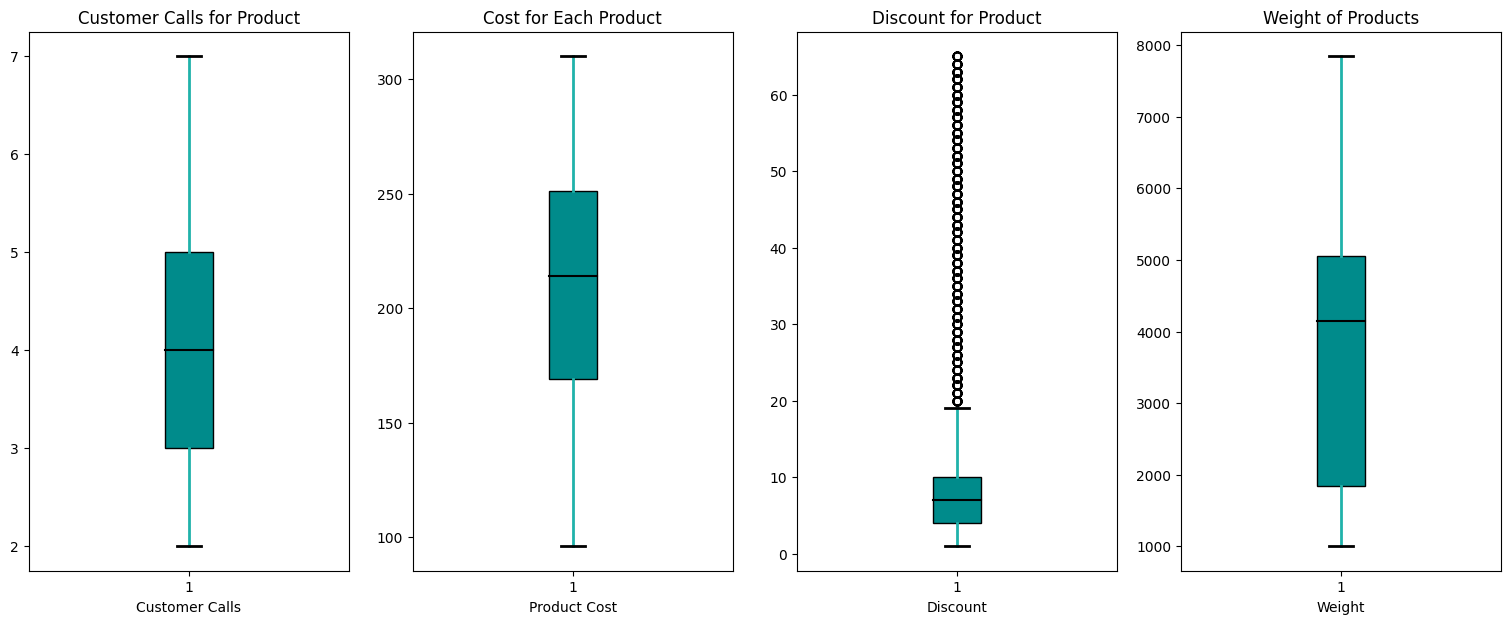

In [14]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib.lines import MarkerStyle
fig, axes= plt.subplots(1,4, figsize=(19,7))
axes[0].boxplot(x='Customer Calls', data=data,
        patch_artist = True, boxprops = dict(facecolor = "darkcyan"), #box plot color
        medianprops = dict(color = "black", linewidth = 1.5), #color of middile line
        whiskerprops = dict(color = "lightseagreen", linewidth = 2), #long outside lines' color
        capprops = dict(color = "black", linewidth = 2))  #upper and lower lines'color
axes[0].set_xlabel('Customer Calls')
axes[0].set_title('Customer Calls for Product')


axes[1].boxplot(x='Product Cost', data=data,
        patch_artist = True, boxprops = dict(facecolor = "darkcyan"),
        medianprops = dict(color = "black", linewidth = 1.5),
        whiskerprops = dict(color = "lightseagreen", linewidth = 2),
        capprops = dict(color = "black", linewidth = 2))
axes[1].set_xlabel('Product Cost')
axes[1].set_title('Cost for Each Product')



axes[2].boxplot(x='Discount',data=data,
        patch_artist = True, boxprops = dict(facecolor = "darkcyan"),
        medianprops = dict(color = "black", linewidth = 1.5),
        whiskerprops = dict(color = "lightseagreen", linewidth = 2),
        capprops = dict(color = "black", linewidth = 2))
axes[2].set_xlabel('Discount')
axes[2].set_title('Discount for Product')


axes[3].boxplot(x='Weight', data=data,
        patch_artist = True, boxprops = dict(facecolor = "darkcyan"),
        medianprops = dict(color = "black", linewidth = 1.5),
        whiskerprops = dict(color = "lightseagreen", linewidth = 2),
        capprops = dict(color = "black", linewidth = 2))
axes[3].set_xlabel('Weight')
axes[3].set_title('Weight of Products')

<ipython-input-15-2e67372902af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


<Axes: >

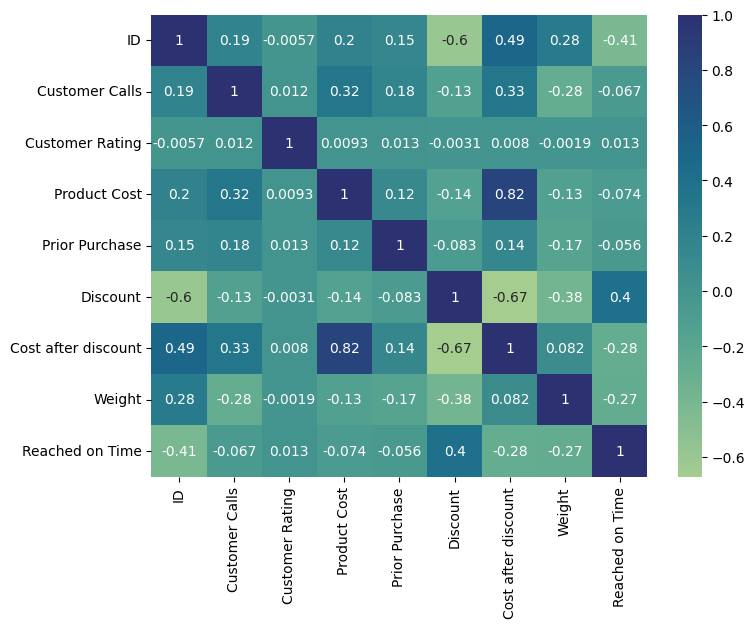

In [15]:
corr_matrix=data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap="crest")
